# EDA on Data Open 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option("display.max_rows", 100)


## EDA on Oscar Award 

In [3]:
df_oscar = pd.read_csv("'../data/the_oscar_award.csv") 
#Academy Awards nominations since 1927
print("df_oscar has shape: {}".format(df_oscar.shape))

df_oscar has shape: (10395, 7)


In [4]:
df_oscar.head(100)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False
8,1927,1928,1,CINEMATOGRAPHY,George Barnes,The Devil Dancer;,False
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True


In [5]:
filt_act = (df_oscar['category'] == 'ACTOR') | (df_oscar['category'] == 'ACTRESS')
df_oscar_gender = df_oscar[filt_act]
print("df_oscar_gender has shape: {}".format(df_oscar_gender.shape))
df_oscar_gender.head(5)

df_oscar_gender has shape: (468, 7)


,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [6]:
df_oscar_gender['category'].value_counts()

ACTRESS    236
ACTOR      232
Name: category, dtype: int64

In [7]:
df_oscar.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [8]:
df_oscar['winner'] = df_oscar['winner'].astype('category').cat.codes.astype(np.int8)

In [9]:
df_oscar['winner'].value_counts()

0    8038
1    2357
Name: winner, dtype: int64

In [10]:
df_oscar['film'] = df_oscar['film'].str.lower()

## Try aggregate df_oscar by winning times 

In [11]:
df_oscar_film = df_oscar.groupby(['film']).agg({'year_film': 'min', 'winner': 'sum'})
print("df_oscar_film has shape: {}".format(df_oscar_film.shape))
df_oscar_film.head(100)

df_oscar_film has shape: (4833, 2)


,year_film,winner
film,,
"$1,000 a minute",1935,0
'38',1986,0
'crocodile' dundee,1986,0
'round midnight,1986,1
(a) torzija [(a) torsion],2003,0
...and justice for all,1979,0
10,1979,0
102 dalmatians,2000,0
12,2007,0


In [12]:
df_oscar_person= df_oscar.groupby(['name']).agg({'year_film': 'min', 'winner': 'sum'})
print("df_oscar_person has shape: {}".format(df_oscar_person.shape))
df_oscar_person.tail(100)

df_oscar_person has shape: (6666, 2)


,year_film,winner
name,,
Written by Deborah Davis and Tony McNamara,2018,0
Written by Denys Arcand,2003,0
Written by Diablo Cody,2007,1
Written by Dustin Lance Black,2008,1
Written by E. Max Frye and Dan Futterman,2014,0
Written by Emily V. Gordon & Kumail Nanjiani,2017,0
Written by Eric Warren Singer and David O. Russell,2013,0
Written by Ethan Coen & Joel Coen,2000,0
Written by Graham Moore,2014,1


## Movie industry

In [13]:
df_movie = pd.read_csv('../data/movie_industry.csv', encoding = "ISO-8859-1" ) 
#popular movies from 1986 to 2016
print("df_movie has shape: {}".format(df_movie.shape))

df_movie has shape: (6820, 15)


In [14]:
df_movie.head(50)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [15]:
df_movie.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [16]:
df_movie['name'] = df_oscar['name'].str.lower()

### Univariate Analysis

In [17]:
df_movie['country'].value_counts()

USA                               4872
UK                                 698
France                             283
Canada                             150
Germany                            134
Australia                           82
Japan                               68
Spain                               56
Italy                               51
Ireland                             44
Hong Kong                           39
India                               39
Denmark                             33
China                               24
South Korea                         20
Belgium                             18
Sweden                              18
New Zealand                         18
Mexico                              15
Argentina                           13
Netherlands                         12
Iran                                12
Russia                              10
South Africa                         9
Taiwan                               8
Czech Republic           

In [18]:
df_movie['genre'].value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Horror        277
Animation     277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
Western         2
War             2
Name: genre, dtype: int64

In [19]:
df_movie['rating'].value_counts()

R                3392
PG-13            1995
PG                951
NOT RATED         174
G                 147
UNRATED            71
Not specified      63
NC-17              22
B15                 1
TV-PG               1
TV-MA               1
B                   1
TV-14               1
Name: rating, dtype: int64

In [20]:
df_movie.loc[(df_movie['rating']=='NOT RATED')|(df_movie['rating']=='Not specified'), 'rating'] = 'UNRATED'
df_movie['rating'].value_counts()

R          3392
PG-13      1995
PG          951
UNRATED     308
G           147
NC-17        22
B15           1
TV-PG         1
TV-MA         1
B             1
TV-14         1
Name: rating, dtype: int64

<AxesSubplot:xlabel='votes', ylabel='Density'>

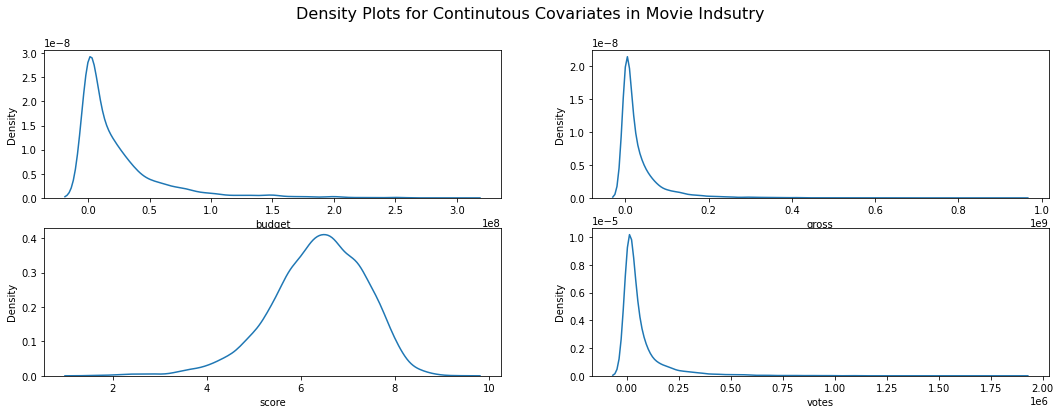

In [21]:
f, axes = plt.subplots(2, 2, figsize=(18,6), sharex=False)
plt.suptitle("Density Plots for Continutous Covariates in Movie Indsutry", fontsize=16)
sns.kdeplot(df_movie['budget'], ax=axes[0,0])
sns.kdeplot(df_movie['gross'], ax=axes[0,1])
sns.kdeplot(df_movie['score'], ax=axes[1,0])
sns.kdeplot(df_movie['votes'], ax=axes[1,1])

### Bivariate Analysis

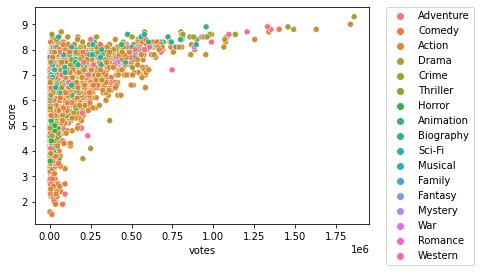

In [22]:
sns.scatterplot(data=df_movie, x="votes", y="score", hue='genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

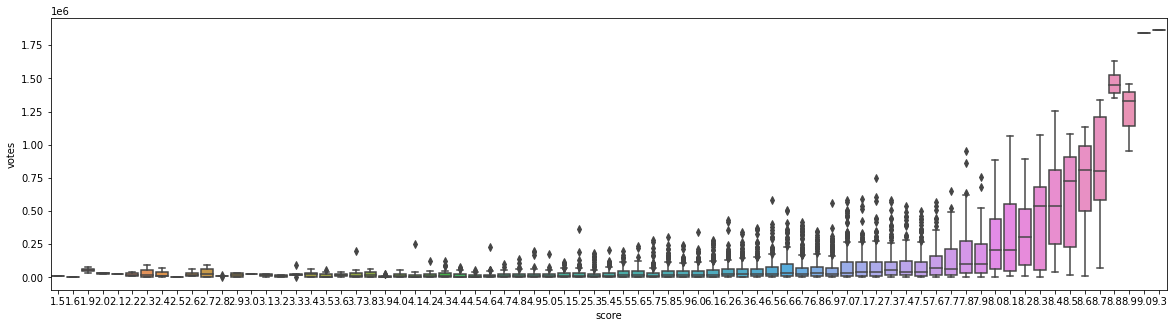

In [23]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x="score", y="votes", 
                 data=df_movie)

In general, if a movie has many votes (>750,000), then the score is high. For movies with fewer votes, the score has a larger range.

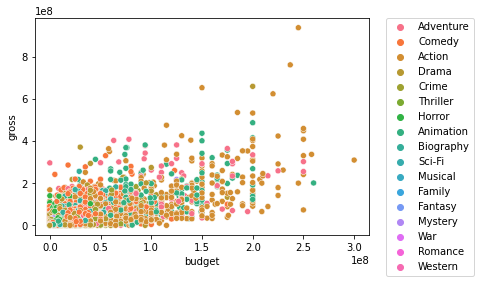

In [24]:
sns.scatterplot(data=df_movie, x="budget", y="gross", hue='genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

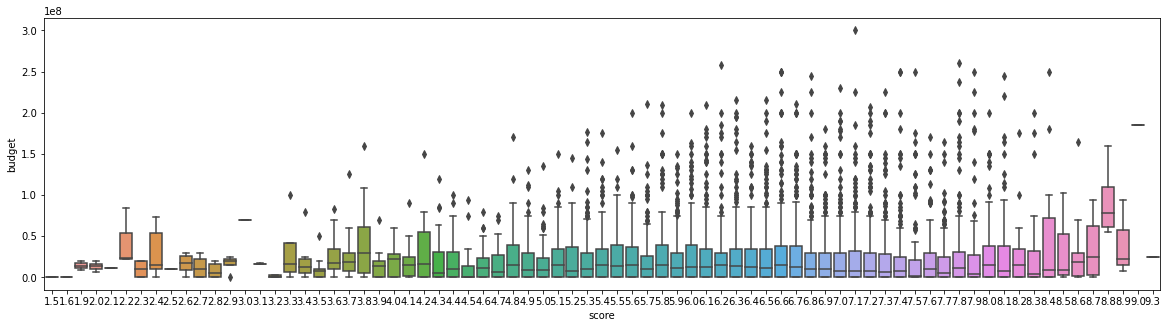

In [25]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x="score", y="budget", 
                 data=df_movie)

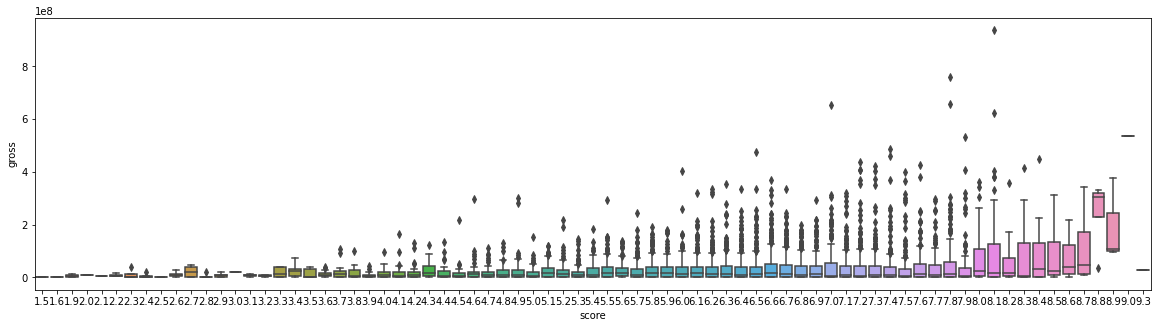

In [26]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x="score", y="gross", 
                 data=df_movie)

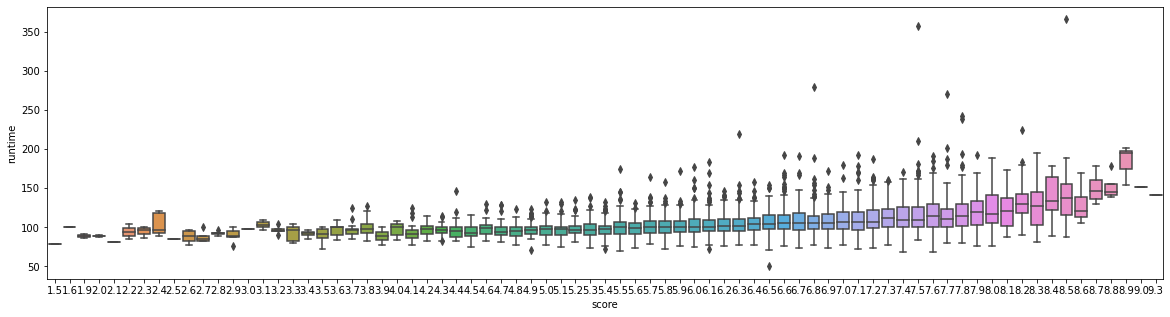

In [27]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x="score", y="runtime", 
                 data=df_movie)

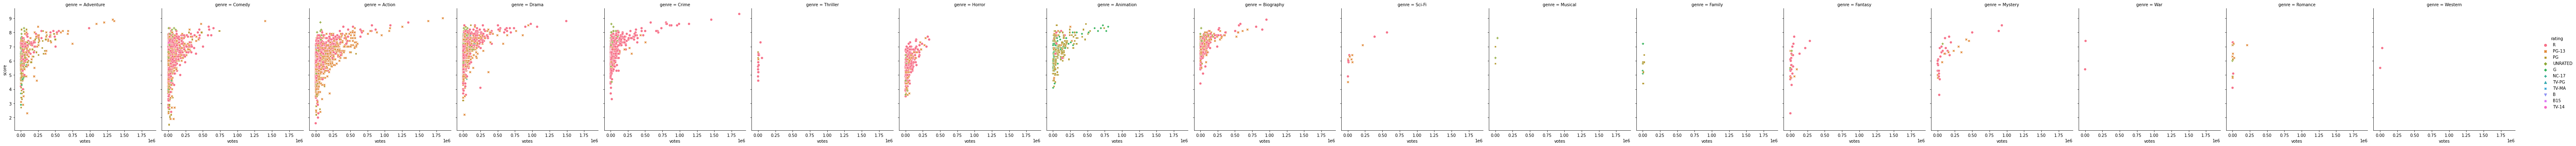

In [28]:
sns.relplot(
    data=df_movie, x="votes", y="score",
    col="genre", hue="rating", style="rating",
    kind="scatter"
)

### Trend over Time

In [29]:
df_movie['year'].value_counts()

1989    221
2015    220
2013    220
1992    220
1996    220
2000    220
2004    220
2008    220
2012    220
2016    220
1993    220
1997    220
2001    220
2005    220
2009    220
1986    220
2011    220
1990    220
1994    220
1998    220
2002    220
2006    220
2010    220
2014    220
1991    220
1995    220
1999    220
2003    220
2007    220
1988    220
1987    219
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='runtime'>

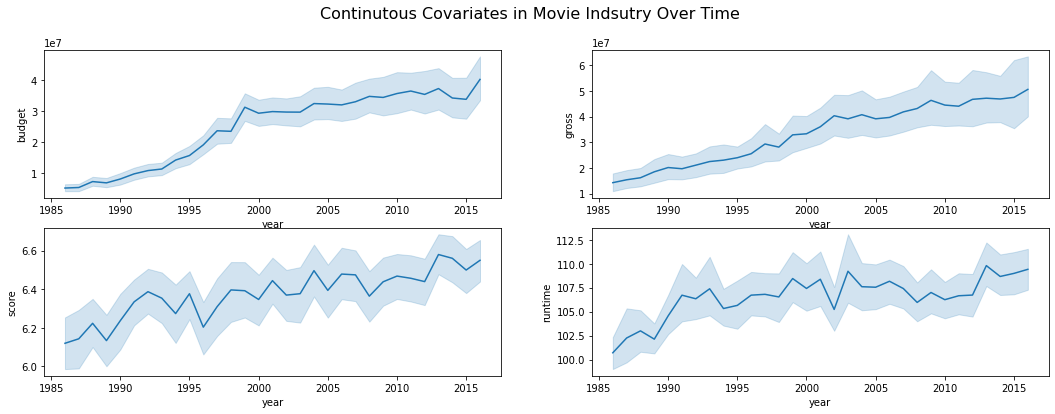

In [30]:
f, axes = plt.subplots(2, 2, figsize=(18,6), sharex=False)
plt.suptitle("Continutous Covariates in Movie Indsutry Over Time", fontsize=16)


sns.lineplot(x="year", y="budget", data=df_movie, ax=axes[0,0])
sns.lineplot(x="year", y="gross", data=df_movie, ax=axes[0,1])
sns.lineplot(x="year", y="score", data=df_movie, ax=axes[1,0])
sns.lineplot(x="year", y="runtime", data=df_movie, ax=axes[1,1])

<AxesSubplot:xlabel='year', ylabel='profit'>

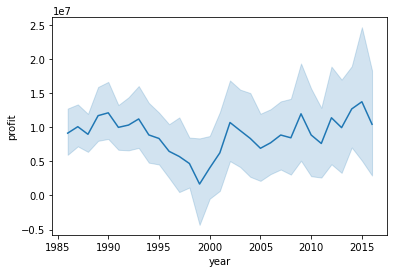

In [31]:
df_movie['profit']= df_movie['gross']-df_movie['budget']
sns.lineplot(x="year", y="profit", data=df_movie)

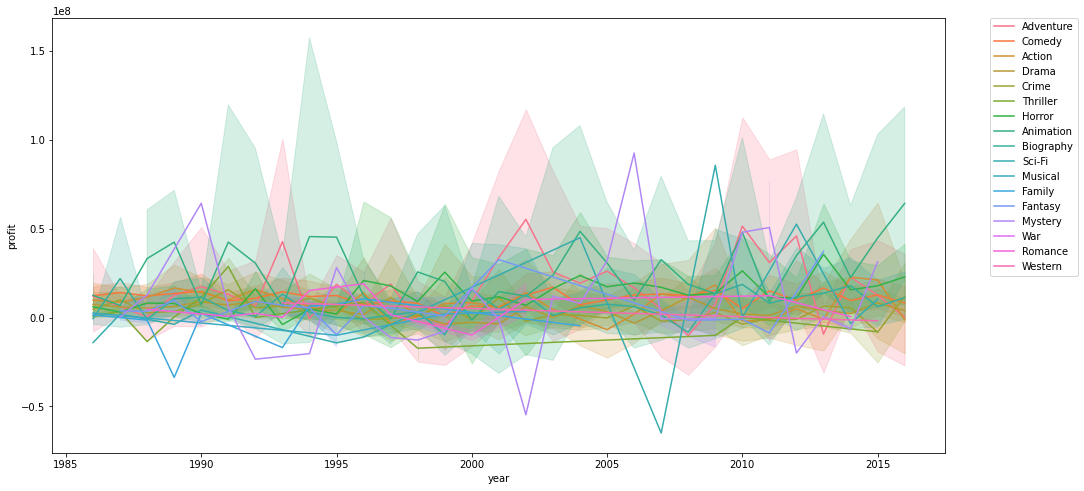

In [32]:
plt.figure(figsize=(16,8))
sns.lineplot(x="year", y="profit", hue="genre",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

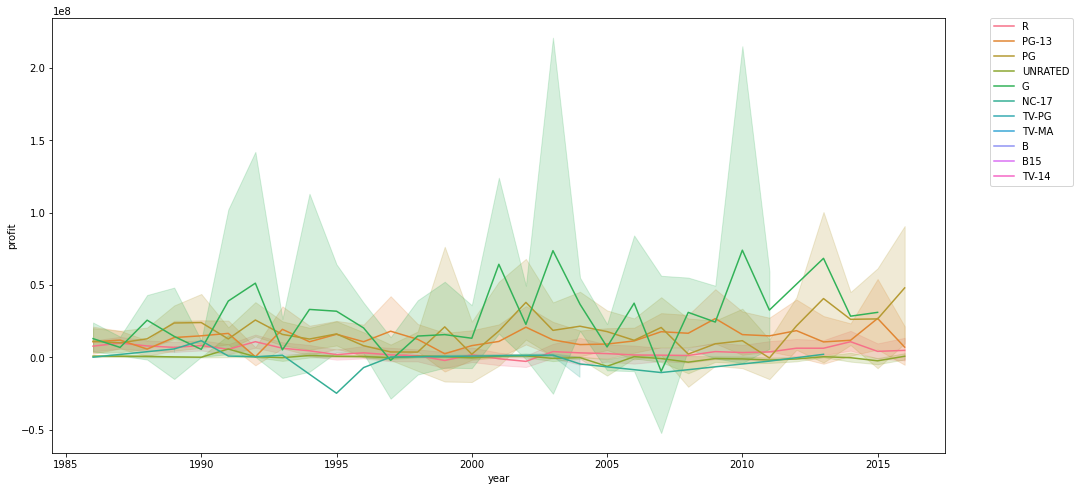

In [33]:
plt.figure(figsize=(16,8))
sns.lineplot(x="year", y="profit", hue="rating",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

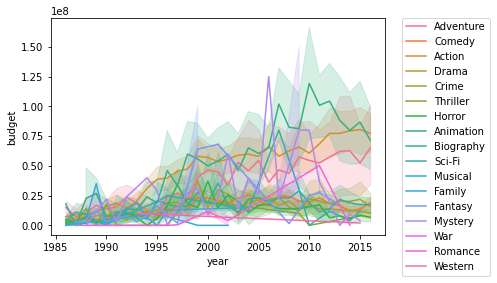

In [34]:
sns.lineplot(x="year", y="budget", hue="genre",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

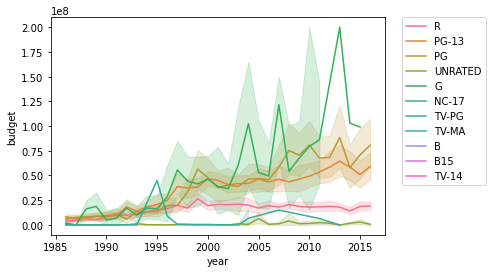

In [35]:
sns.lineplot(x="year", y="budget", hue="rating",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

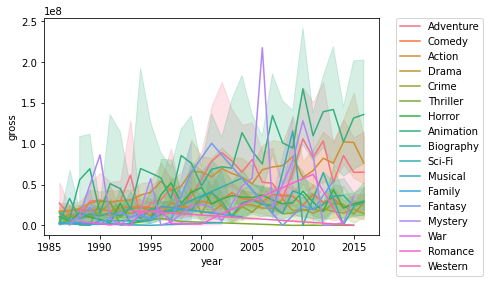

In [36]:
sns.lineplot(x="year", y="gross", hue="genre",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

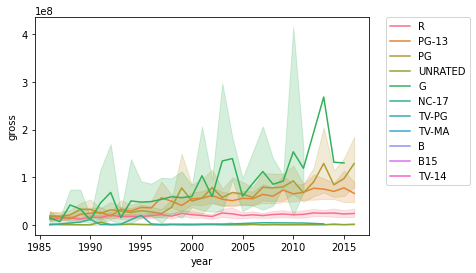

In [37]:
sns.lineplot(x="year", y="gross", hue="rating",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

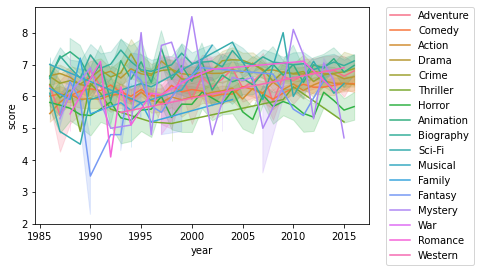

In [38]:
sns.lineplot(x="year", y="score", hue="genre",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

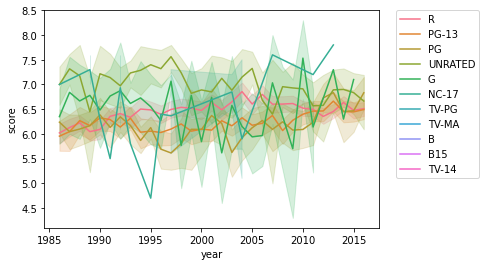

In [39]:
sns.lineplot(x="year", y="score", hue="rating",
             data=df_movie)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [40]:
df_movie.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
profit      float64
dtype: object

<AxesSubplot:>

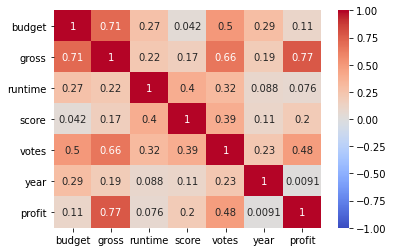

In [41]:
df_movie[['company', 'country', 'director', 'genre', 'name', 'star', 'writer']] = df_movie[['company', 
                                                                                            'country', 'director', 'genre', 'name', 'star', 'writer']].astype('category')
sns.heatmap(df_movie.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


In [42]:
df_movie['genre'].value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Animation     277
Horror        277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
War             2
Western         2
Name: genre, dtype: int64

### One hot encoding for genre and rating 

In [43]:
rating = pd.get_dummies(df_movie['rating'])
df_movie = pd.concat([df_movie, rating], axis=1, sort=False)
genre = pd.get_dummies(df_movie['genre'])
df_movie = pd.concat([df_movie, genre], axis=1, sort=False)
df_movie.drop(columns = ['rating', 'genre'], inplace=True)
df_movie.head()

,budget,company,country,director,gross,name,released,runtime,score,star,votes,writer,year,profit,B,B15,G,NC-17,PG,PG-13,R,TV-14,TV-MA,TV-PG,UNRATED,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,52287414.0,richard barthelmess,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6000000.0,Paramount Pictures,USA,John Hughes,70136369.0,emil jannings,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,15000000.0,Paramount Pictures,USA,Tony Scott,179800601.0,louise dresser,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,85160248.0,janet gaynor,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,18564613.0,gloria swanson,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
def top_k_corr_plot(k, df, figsize):
    corr = df.corr()
    cols = abs(corr).nlargest(k, 'score')['score'].index
    cm = np.corrcoef(df[cols].values.T)
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1.25)
    plt.title("Correlation Matrix with top {} most correlated features to score".format(k), fontsize=15)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
                    yticklabels=cols.values, xticklabels=cols.values,
                    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
    

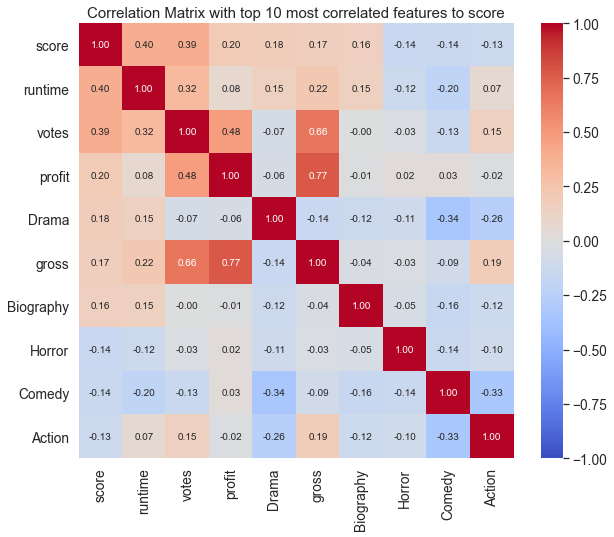

In [45]:
top_k_corr_plot(10, df_movie, figsize=(10,8))

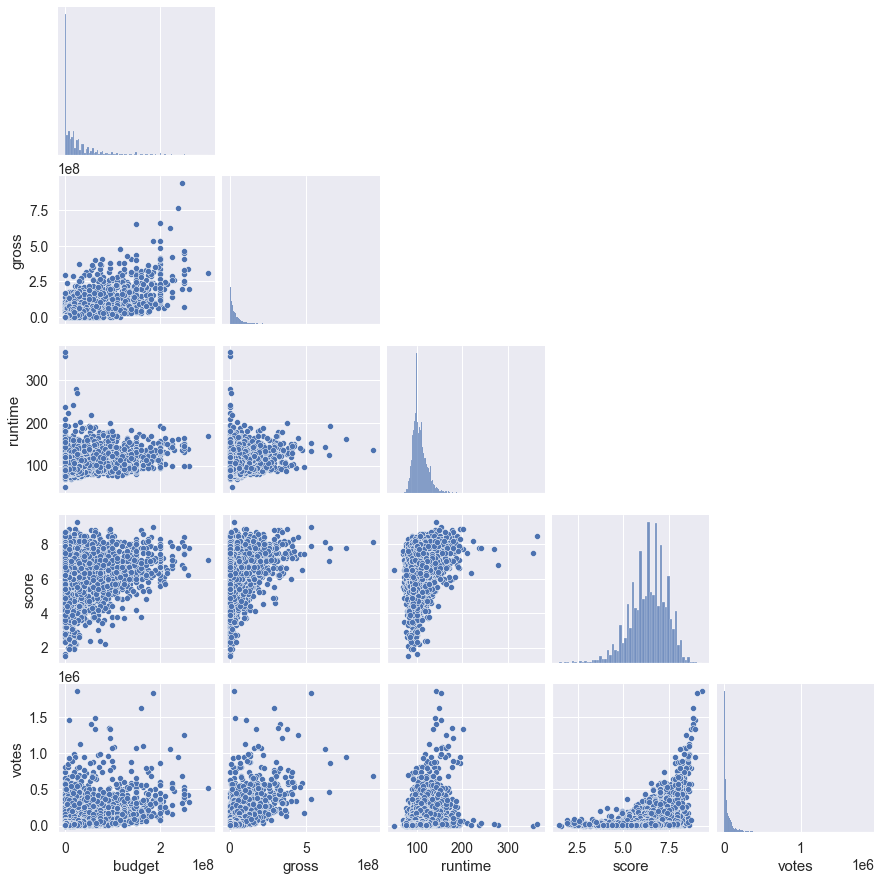

In [46]:
sns.pairplot(df_movie, vars=['budget', 'gross', 'runtime', 'score', 'votes'], corner=True)

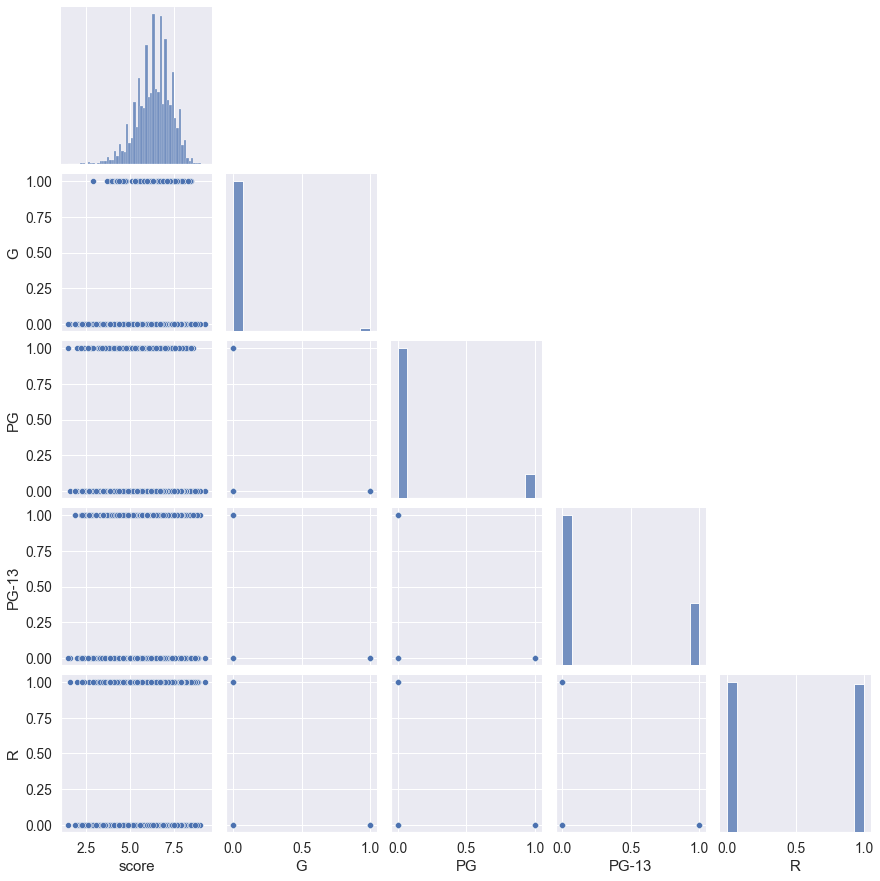

In [47]:
sns.pairplot(df_movie, vars=['score', 'G', 'PG', 'PG-13', 'R'], corner=True)

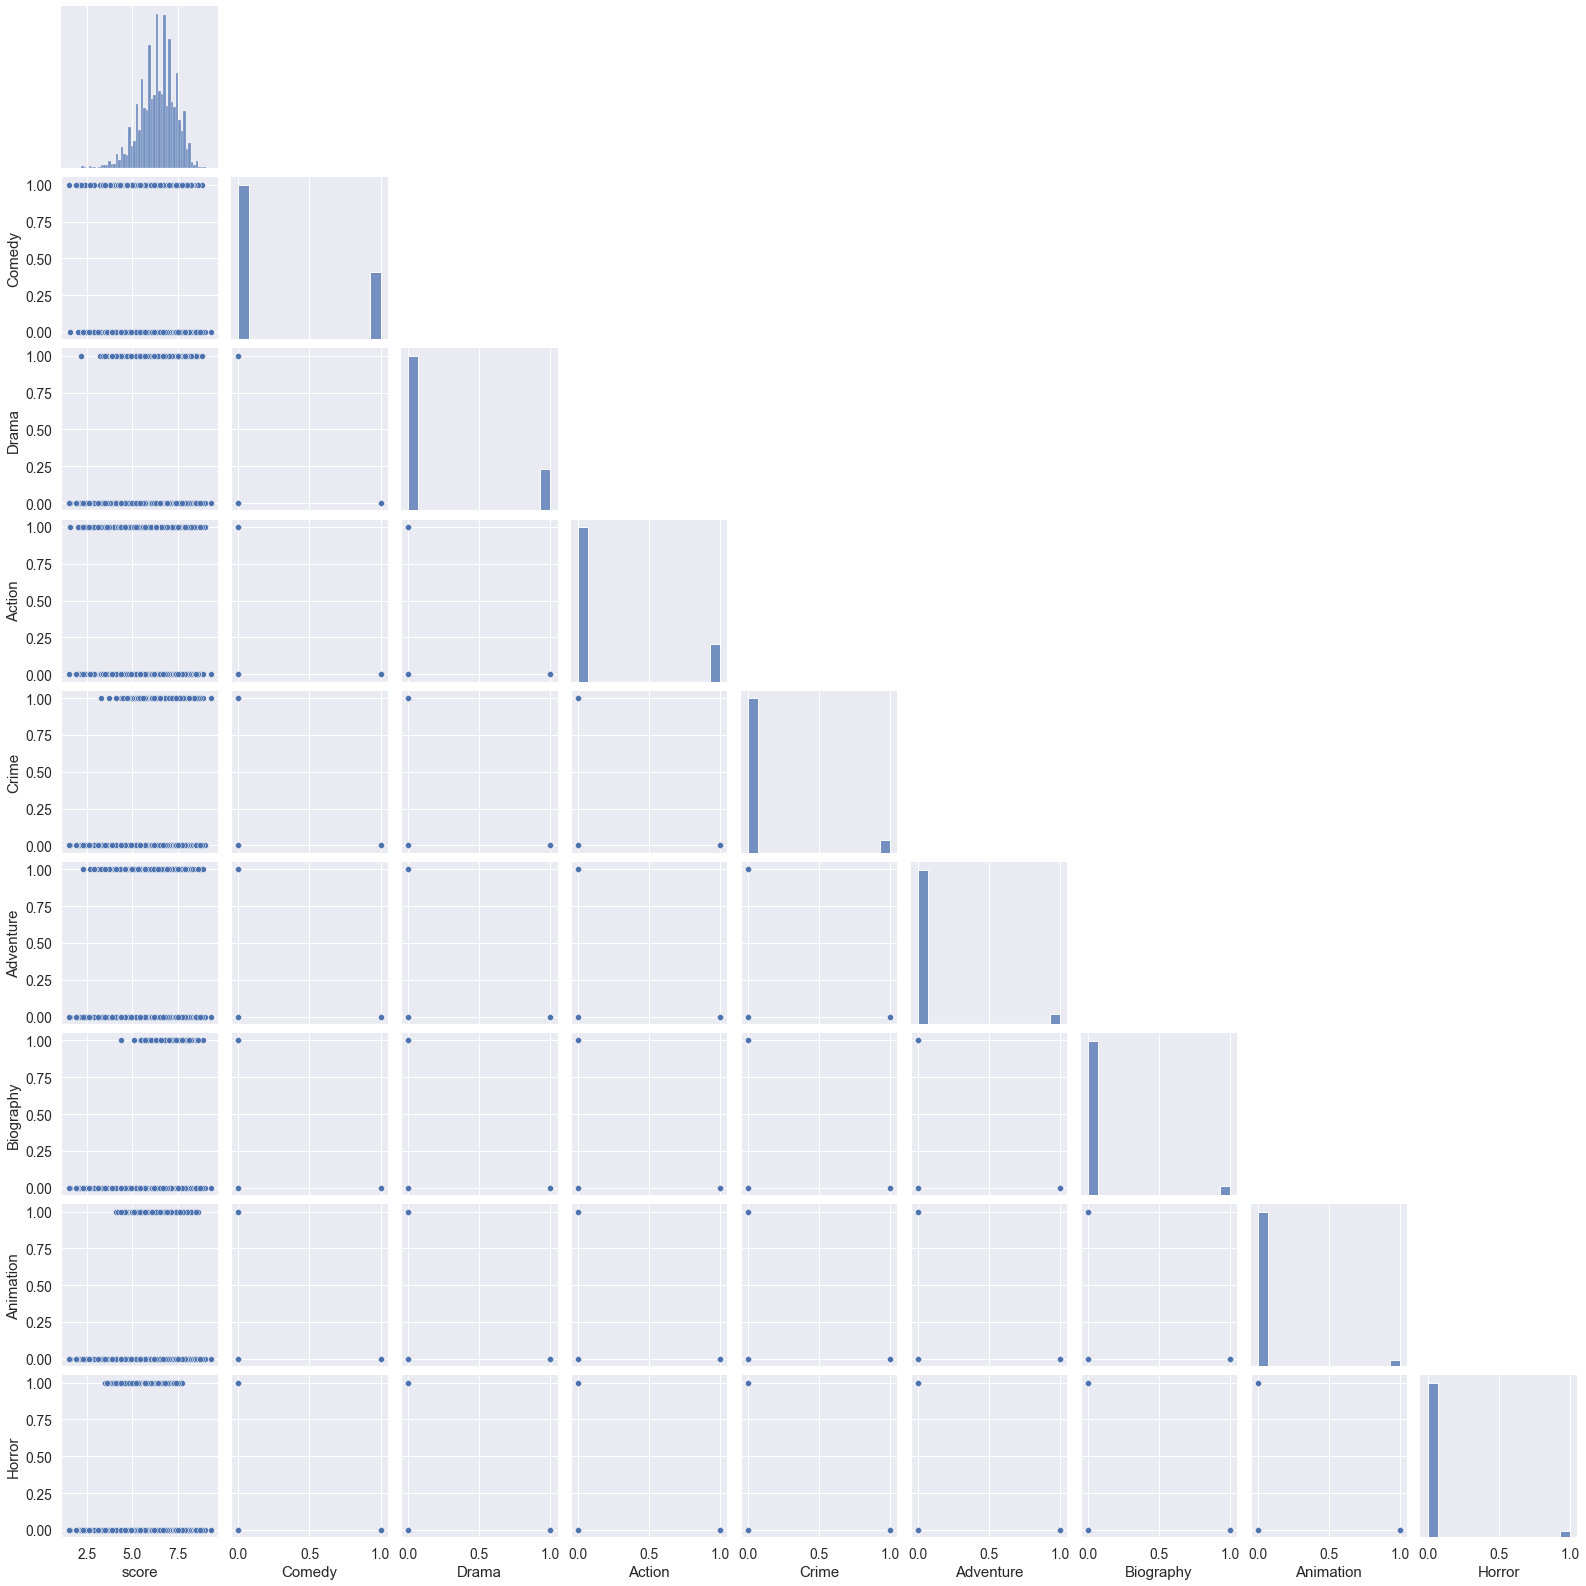

In [48]:
sns.pairplot(df_movie, vars=['score', 'Comedy', 'Drama', 'Action', 'Crime', 'Adventure', 'Biography',
                             'Animation', 'Horror'], corner=True)

## Feature Importance

In [49]:
from sklearn.linear_model import LinearRegression

In [56]:
y = df_movie['score'].copy()
x = df_movie[['budget', 'gross', 
       'runtime',  'votes', 'profit', 'B',
       'B15', 'G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-MA', 'TV-PG',
       'UNRATED', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].copy()

In [57]:
x.dtypes

budget       float64
gross        float64
runtime        int64
votes          int64
profit       float64
B              uint8
B15            uint8
G              uint8
NC-17          uint8
PG             uint8
PG-13          uint8
R              uint8
TV-14          uint8
TV-MA          uint8
TV-PG          uint8
UNRATED        uint8
Action         uint8
Adventure      uint8
Animation      uint8
Biography      uint8
Comedy         uint8
Crime          uint8
Drama          uint8
Family         uint8
Fantasy        uint8
Horror         uint8
Musical        uint8
Mystery        uint8
Romance        uint8
Sci-Fi         uint8
Thriller       uint8
War            uint8
Western        uint8
dtype: object

<AxesSubplot:>

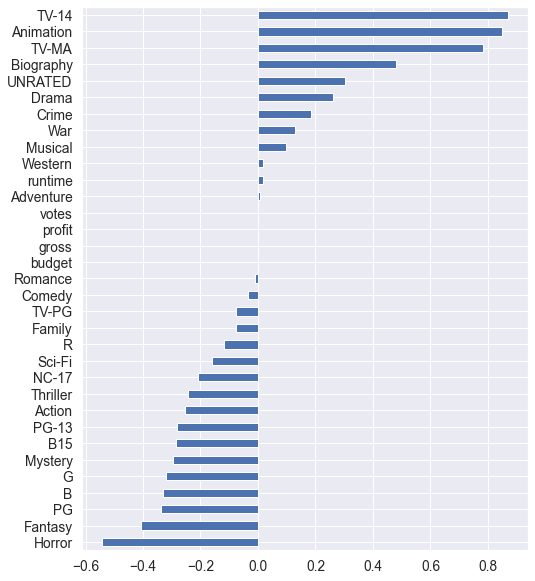

In [63]:
LR = LinearRegression()
LR.fit(x, y)
importance = LR.coef_
coef=pd.Series(importance, index=x.columns)
imp_coef=coef.sort_values()
plt.rcParams['figure.figsize']=(8,10)
imp_coef.plot(kind='barh')

# Add Oscar Info to Movie Industry 

In [218]:
df_oscar_film_1986 = df_oscar_film[df_oscar_film['year_film']> 1986]
df_oscar_film_1986

,year_film,winner
film,,
(a) torzija [(a) torsion],2003,0
102 dalmatians,2000,0
12,2007,0
12 monkeys,1995,0
12 years a slave,2013,3
...,...,...
zelary,2003,0
zero dark thirty,2012,1
zootopia,2016,1


In [219]:
df_oscar_film_1986.index

Index(['(a) torzija [(a) torsion]', '102 dalmatians', '12', '12 monkeys',
       '12 years a slave', '127 hours', '12:01 pm',
       '13 hours: the secret soldiers of benghazi', '13th', '1917',
       ...
       'you don't have to die', 'young at heart', 'young guns ii', 'your face',
       'youth', 'zelary', 'zero dark thirty', 'zootopia', 'zus & zo',
       'éramos pocos (one too many)'],
      dtype='object', name='film', length=1766)

In [205]:
df_movie.head()

,budget,company,country,director,gross,name,released,runtime,score,star,votes,writer,year,B,B15,G,NC-17,PG,PG-13,R,TV-14,TV-MA,TV-PG,UNRATED,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,52287414.0,richard barthelmess,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6000000.0,Paramount Pictures,USA,John Hughes,70136369.0,emil jannings,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,15000000.0,Paramount Pictures,USA,Tony Scott,179800601.0,louise dresser,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,85160248.0,janet gaynor,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,18564613.0,gloria swanson,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
df_oscar_film_1986.reset_index(inplace=True)
df_oscar_film_1986.head()

,index,film,year_film,winner
0,0,(a) torzija [(a) torsion],2003,0
1,1,102 dalmatians,2000,0
2,2,12,2007,0
3,3,12 monkeys,1995,0
4,4,12 years a slave,2013,3


In [211]:
df = pd.merge(df_movie, df_oscar_film_1986, how='inner', left_on=['name'], right_on=['film'])
df.head()

,budget,company,country,director,gross,name,released,runtime,score,star,votes,writer,year,B,B15,G,NC-17,PG,PG-13,R,TV-14,TV-MA,TV-PG,UNRATED,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,film,year_film,winner
